In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Load data

In [2]:
file = '/Users/danichao/self_data/dairy/Processing_volume_for_dairy_products.csv'
processing_volume = pd.read_csv(file)
processing_volume

year      total       1        2        3        4        5        6    
0   1985.0  2,965,910  261,937  210,236  275,668  272,943  266,557  255,867  \
1   1986.0  2,969,805  279,371  226,665  290,857  284,512  280,248  250,798   
2   1987.0  2,626,959  246,609  183,809  232,917  243,610  250,801  224,857   
3   1988.0  2,718,497  242,342  199,219  250,523  245,284  250,279  224,329   
4   1989.0  2,988,931  262,811  216,319  270,934  261,924  280,575  256,049   
5   1990.0  3,001,640  289,737  234,314  291,323  292,397  293,033  251,100   
6   1991.0  3,043,713  278,866  226,581  293,101  279,138  281,898  238,846   
7   1992.0  3,328,549  298,131  254,661  304,793  295,849  300,610  272,610   
8   1993.0  3,470,589  323,364  269,244  329,246  310,301  323,015  289,149   
9   1994.0  2,997,531  299,783  243,163  289,374  278,766  287,346  262,063   
10  1995.0  3,105,877  276,942  239,445  301,068  288,447  287,847  254,243   
11  1996.0  3,351,084  307,674  268,040  321,732  304,705  310,715  273,637   
12  1997.0  3,375,030  312,408  262,782  321,854  303,433  298,307  272,106   
13  1998.0  3,420,380  323,483  269,707  324,719  301,682  310,518  288,035   
14  1999.0  3,406,545  320,590  270,402  326,036  311,438  312,545  279,319   
15  2000.0  3,420,517  338,833  297,454  344,603  332,842  335,353  288,448   
16  2001.0  3,266,303  300,057  256,856  310,754  295,725  289,896  257,662   
17  2002.0  3,293,367  317,465  274,623  325,906  304,619  302,559  261,153   
18  2003.0  3,339,775  295,621  259,424  315,005  293,647  295,143  264,577   
19  2004.0  3,292,397  301,975  264,590  308,013  290,894  308,574  272,903   
20  2005.0  3,429,456  300,720  262,917  319,978  302,408  304,064  274,733   
21  2006.0  3,408,095  319,601  280,125  326,664  311,433  316,645  278,880   
22  2007.0  3,402,339  311,439  272,306  323,533  312,126  309,976  275,485   
23  2008.0  3,457,962  319,833  288,558  329,609  313,779  319,835  284,723   
24  2009.0  3,570,453  317,914  276,503  336,351  316,115  324,925  289,420   
25  2010.0  3,498,582  323,763  284,824  338,549  321,407  321,055  292,376   
26  2011.0  3,350,909  312,831  273,453  313,487  287,876  297,961  271,412   
27  2012.0  3,527,910  315,632  286,065  334,495  316,702  315,862  285,814   
28  2013.0  3,476,528  318,662  288,565  339,157  321,246  320,073  287,033   
29  2014.0  3,364,492  307,918  265,027  322,462  302,753  303,185  268,280   
30  2015.0  3,389,838  304,357  269,254  318,505  297,955  296,945  270,983   
31  2016.0  3,349,178  305,251  277,208  318,288  302,617  298,934  271,736   
32  2017.0  3,240,814  289,266  256,412  307,678  285,126  293,857  264,159   
33  2018.0  3,243,275  292,995  261,628  315,866  295,369  291,917  265,348   
34  2019.0  3,269,669  286,198  258,297  313,859  295,369  292,634  265,471   
35  2020.0  3,374,111  295,657  278,785  335,008  315,848  318,410  264,526   
36  2021.0  3,542,626  295,934  271,529  322,411  312,107  317,062  284,627   
37     NaN        NaN      NaN      NaN      NaN      NaN      NaN      NaN   

         7        8        9       10       11       12   
0   247,734  246,431  207,711  234,227  226,693  259,906  
1   252,839  249,894  195,586  219,201  206,454  233,380  
2   226,573  233,642  177,669  195,138  188,619  222,715  
3   234,842  245,019  185,765  204,848  201,146  234,901  
4   253,445  263,551  200,264  231,283  223,348  268,428  
5   236,790  239,305  188,705  210,279  214,136  260,521  
6   235,416  256,495  205,834  232,012  233,757  281,769  
7   278,135  286,168  220,156  256,443  256,562  304,431  
8   296,218  311,539  240,834  252,634  237,298  287,747  
9   232,598  228,306  197,292  214,544  205,177  259,119  
10  239,255  238,108  215,080  238,214  241,319  285,909  
11  260,221  271,012  235,536  257,591  246,771  293,450  
12  272,792  290,748  224,777  255,917  254,325  305,581  
13  280,198  288,785  234,205  247,530  252,861  298,657  
14  289,721  263,833  222,593  244,610 

We need to drop NaN and convert years and volume values into correct format. 

# Data pre-processing

In [3]:
processing_volume = processing_volume.drop(index=37)
processing_volume['year'] = pd.to_datetime(processing_volume['year'], format='%Y').dt.strftime('%Y')
column_names = processing_volume.columns
for i in range(len(column_names)):
    if i!=0:
        processing_volume[column_names[i]] = processing_volume[column_names[i]].str.replace(',', '').astype(float)

In [4]:
processing_volume

year      total        1         2         3         4         5    
0   1985  2965910.0  261937.0  210236.0  275668.0  272943.0  266557.0  \
1   1986  2969805.0  279371.0  226665.0  290857.0  284512.0  280248.0   
2   1987  2626959.0  246609.0  183809.0  232917.0  243610.0  250801.0   
3   1988  2718497.0  242342.0  199219.0  250523.0  245284.0  250279.0   
4   1989  2988931.0  262811.0  216319.0  270934.0  261924.0  280575.0   
5   1990  3001640.0  289737.0  234314.0  291323.0  292397.0  293033.0   
6   1991  3043713.0  278866.0  226581.0  293101.0  279138.0  281898.0   
7   1992  3328549.0  298131.0  254661.0  304793.0  295849.0  300610.0   
8   1993  3470589.0  323364.0  269244.0  329246.0  310301.0  323015.0   
9   1994  2997531.0  299783.0  243163.0  289374.0  278766.0  287346.0   
10  1995  3105877.0  276942.0  239445.0  301068.0  288447.0  287847.0   
11  1996  3351084.0  307674.0  268040.0  321732.0  304705.0  310715.0   
12  1997  3375030.0  312408.0  262782.0  321854.0  303433.0  298307.0   
13  1998  3420380.0  323483.0  269707.0  324719.0  301682.0  310518.0   
14  1999  3406545.0  320590.0  270402.0  326036.0  311438.0  312545.0   
15  2000  3420517.0  338833.0  297454.0  344603.0  332842.0  335353.0   
16  2001  3266303.0  300057.0  256856.0  310754.0  295725.0  289896.0   
17  2002  3293367.0  317465.0  274623.0  325906.0  304619.0  302559.0   
18  2003  3339775.0  295621.0  259424.0  315005.0  293647.0  295143.0   
19  2004  3292397.0  301975.0  264590.0  308013.0  290894.0  308574.0   
20  2005  3429456.0  300720.0  262917.0  319978.0  302408.0  304064.0   
21  2006  3408095.0  319601.0  280125.0  326664.0  311433.0  316645.0   
22  2007  3402339.0  311439.0  272306.0  323533.0  312126.0  309976.0   
23  2008  3457962.0  319833.0  288558.0  329609.0  313779.0  319835.0   
24  2009  3570453.0  317914.0  276503.0  336351.0  316115.0  324925.0   
25  2010  3498582.0  323763.0  284824.0  338549.0  321407.0  321055.0   
26  2011  3350909.0  312831.0  273453.0  313487.0  287876.0  297961.0   
27  2012  3527910.0  315632.0  286065.0  334495.0  316702.0  315862.0   
28  2013  3476528.0  318662.0  288565.0  339157.0  321246.0  320073.0   
29  2014  3364492.0  307918.0  265027.0  322462.0  302753.0  303185.0   
30  2015  3389838.0  304357.0  269254.0  318505.0  297955.0  296945.0   
31  2016  3349178.0  305251.0  277208.0  318288.0  302617.0  298934.0   
32  2017  3240814.0  289266.0  256412.0  307678.0  285126.0  293857.0   
33  2018  3243275.0  292995.0  261628.0  315866.0  295369.0  291917.0   
34  2019  3269669.0  286198.0  258297.0  313859.0  295369.0  292634.0   
35  2020  3374111.0  295657.0  278785.0  335008.0  315848.0  318410.0   
36  2021  3542626.0  295934.0  271529.0  322411.0  312107.0  317062.0   

          6         7         8         9        10        11        12   
0   255867.0  247734.0  246431.0  207711.0  234227.0  226693.0  259906.0  
1   250798.0  252839.0  249894.0  195586.0  219201.0  206454.0  233380.0  
2   224857.0  226573.0  233642.0  177669.0  195138.0  188619.0  222715.0  
3   224329.0  234842.0  245019.0  185765.0  204848.0  201146.0  234901.0  
4   256049.0  253445.0  263551.0  200264.0  231283.0  223348.0  268428.0  
5   251100.0  236790.0  239305.0  188705.0  210279.0  214136.0  260521.0  
6   238846.0  235416.0  256495.0  205834.0  232012.0  233757.0  281769.0  
7   272610.0  278135.0  286168.0  220156.0  256443.0  256562.0  304431.0  
8   289149.0  296218.0  311539.0  240834.0  252634.0  237298.0  287747.0  
9   262063.0  232598.0  228306.0  197292.0  214544.0  205177.0  259119.0  
10  254243.0  239255.0  238108.0  215080.0  238214.0  241319.0  285909.0  
11  273637.0  260221.0  271012.0  235536.0  257591.0  246771.0  293450.0  
12  272106.0  272792.0  290748.0  224777.0  255917.0  254325.0  305581.0  
13  288035.0  280198.0  288785.0  234205.0  247530.0  252861.0  298657.0  
14  279319.0  289721.0  263833.0  222593.0  244610.0  258433.0  307025.0  
15  288448.0  255506.0  25781

# Visualize

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='year', ylabel='total'>

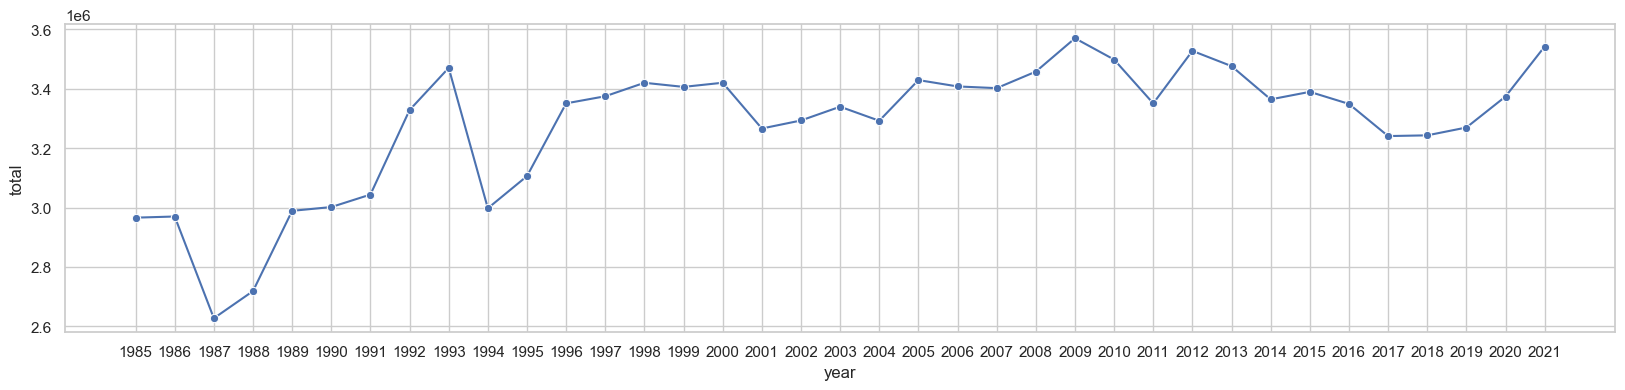

In [6]:
fig = plt.figure(figsize=(20, 4))
sns.set_theme(style="whitegrid")
sns.lineplot(data=processing_volume, x='year', y='total', marker='o')

- Nowadays total processing volume of dairy products is larger than past.
- ***The drop in 1987 and the rise in 1992-1993 worth for an investigation.***

### See monthly volumes in every year

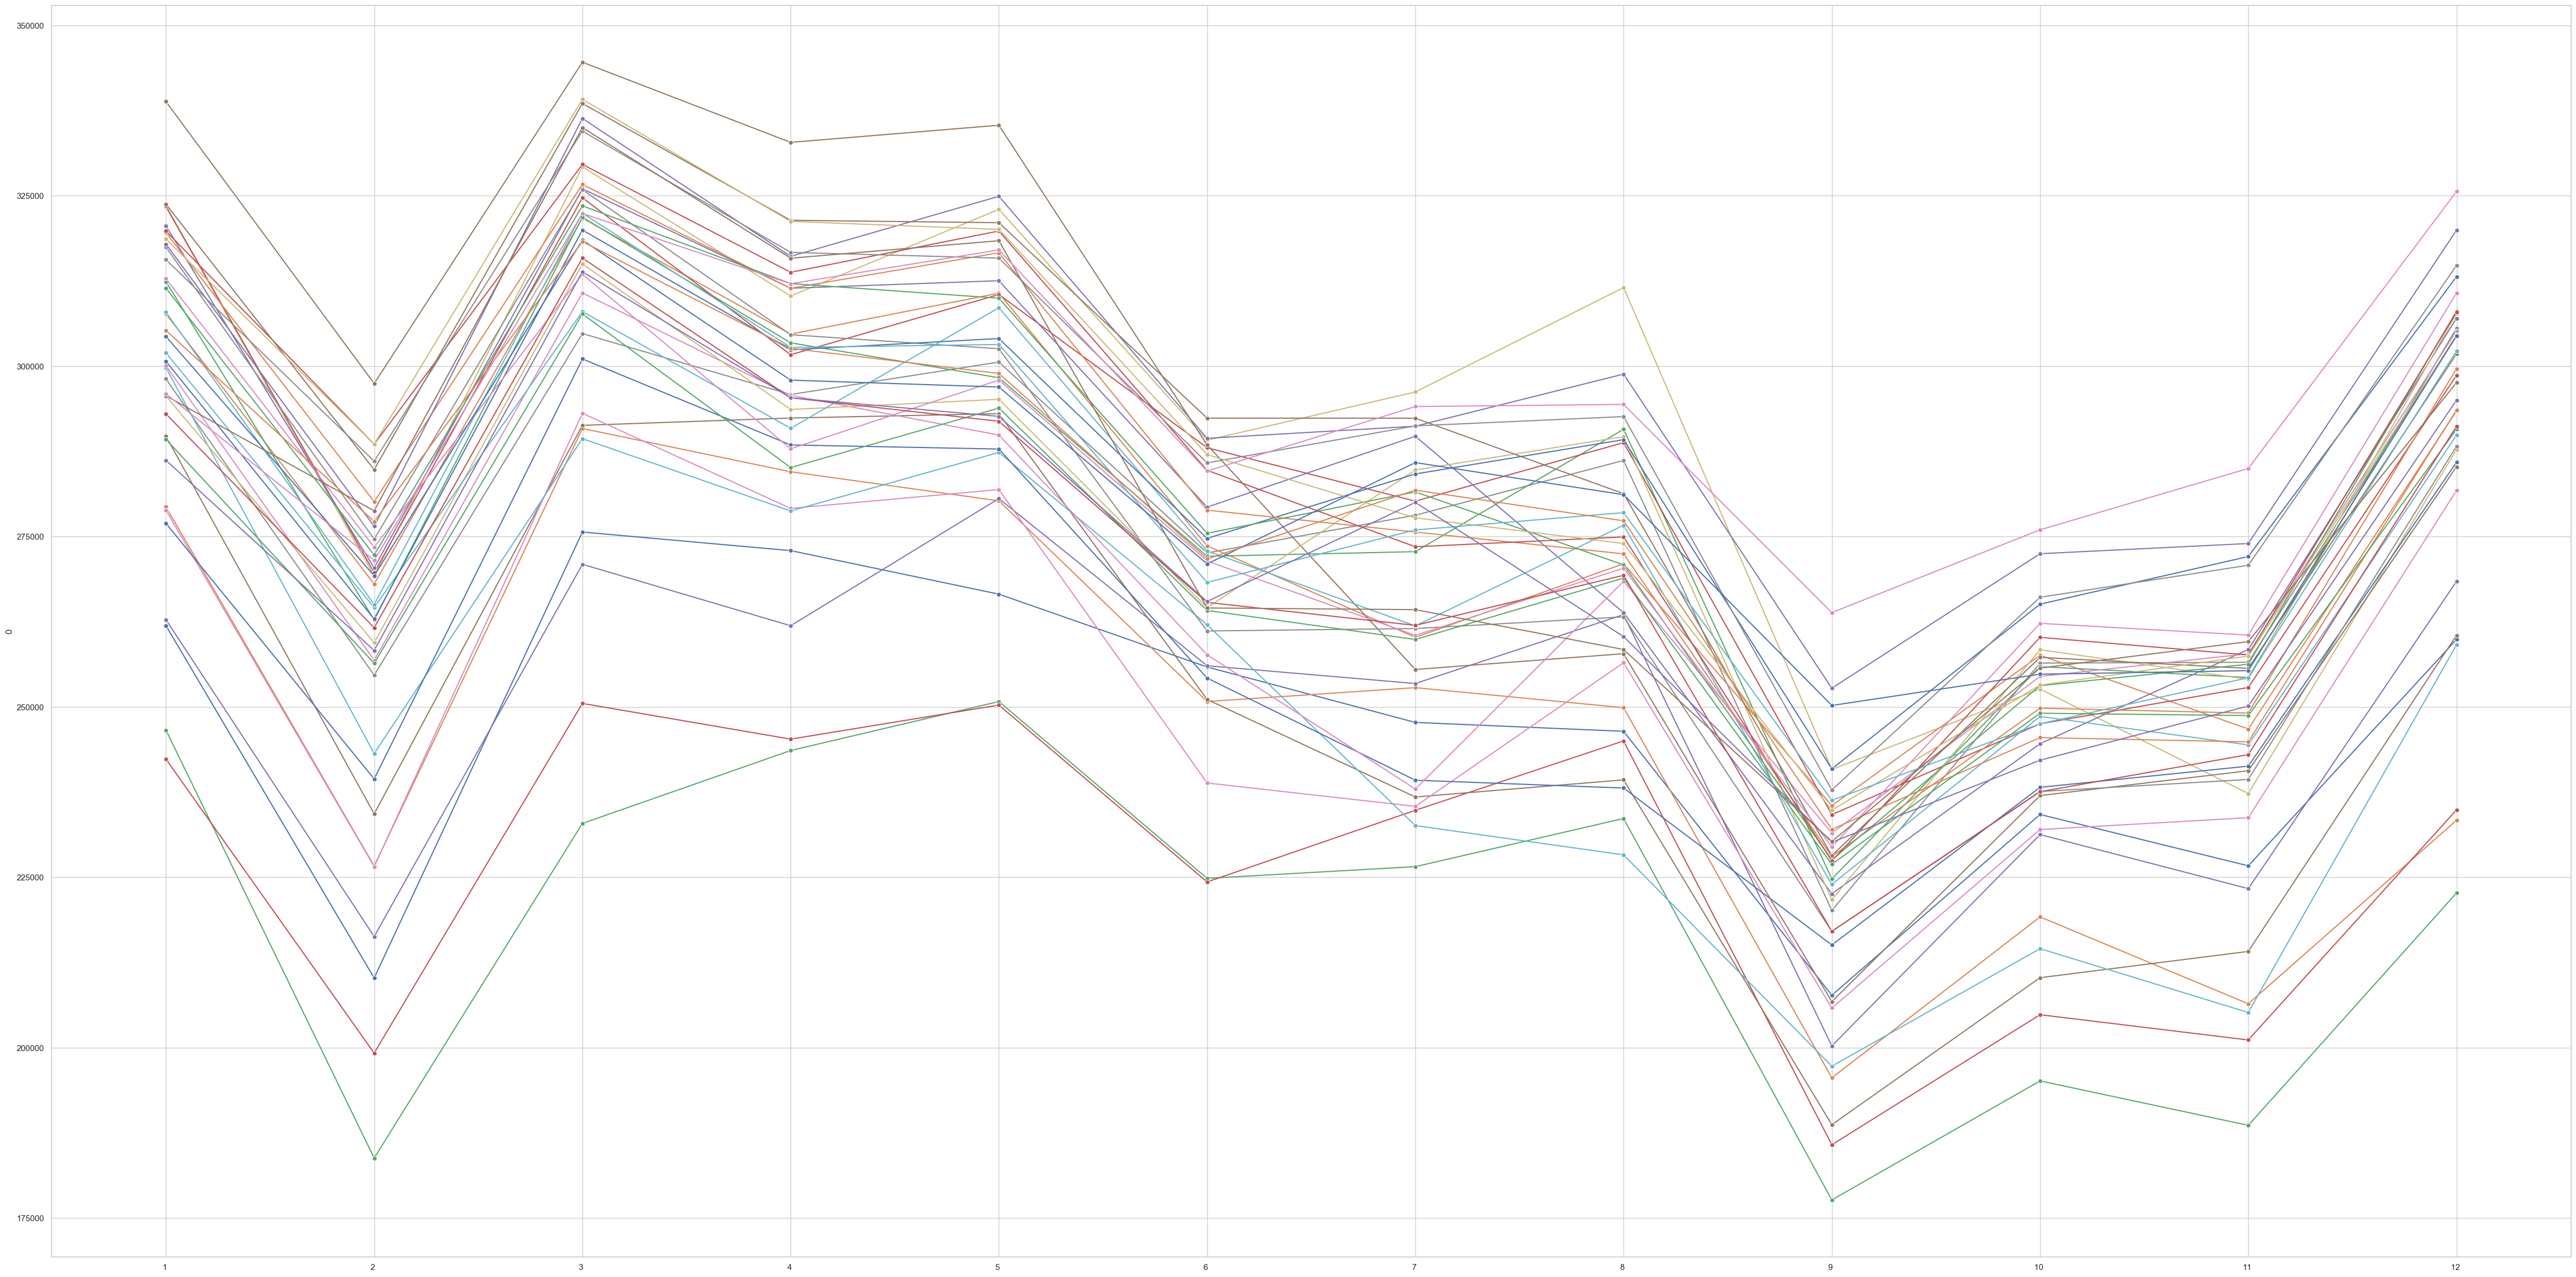

In [7]:
fig = plt.figure(figsize=(60, 30))
sns.set_theme(style="whitegrid")
for i in range(processing_volume.shape[0]):
    sns.lineplot(data=processing_volume.iloc[i, 2:], marker='o')

Generally, every year follow the same trend, and there always huge drops in February and September, and rise from November to January.

***It is also worthy to investigate the drops in Febrauary and September.***

#### See monthly volume over years

<Axes: >

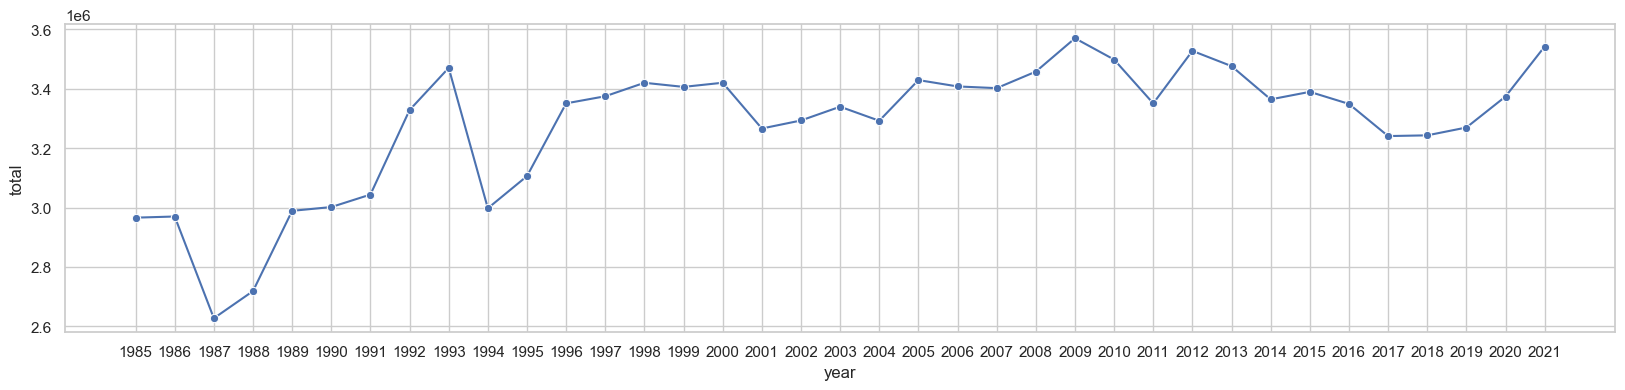

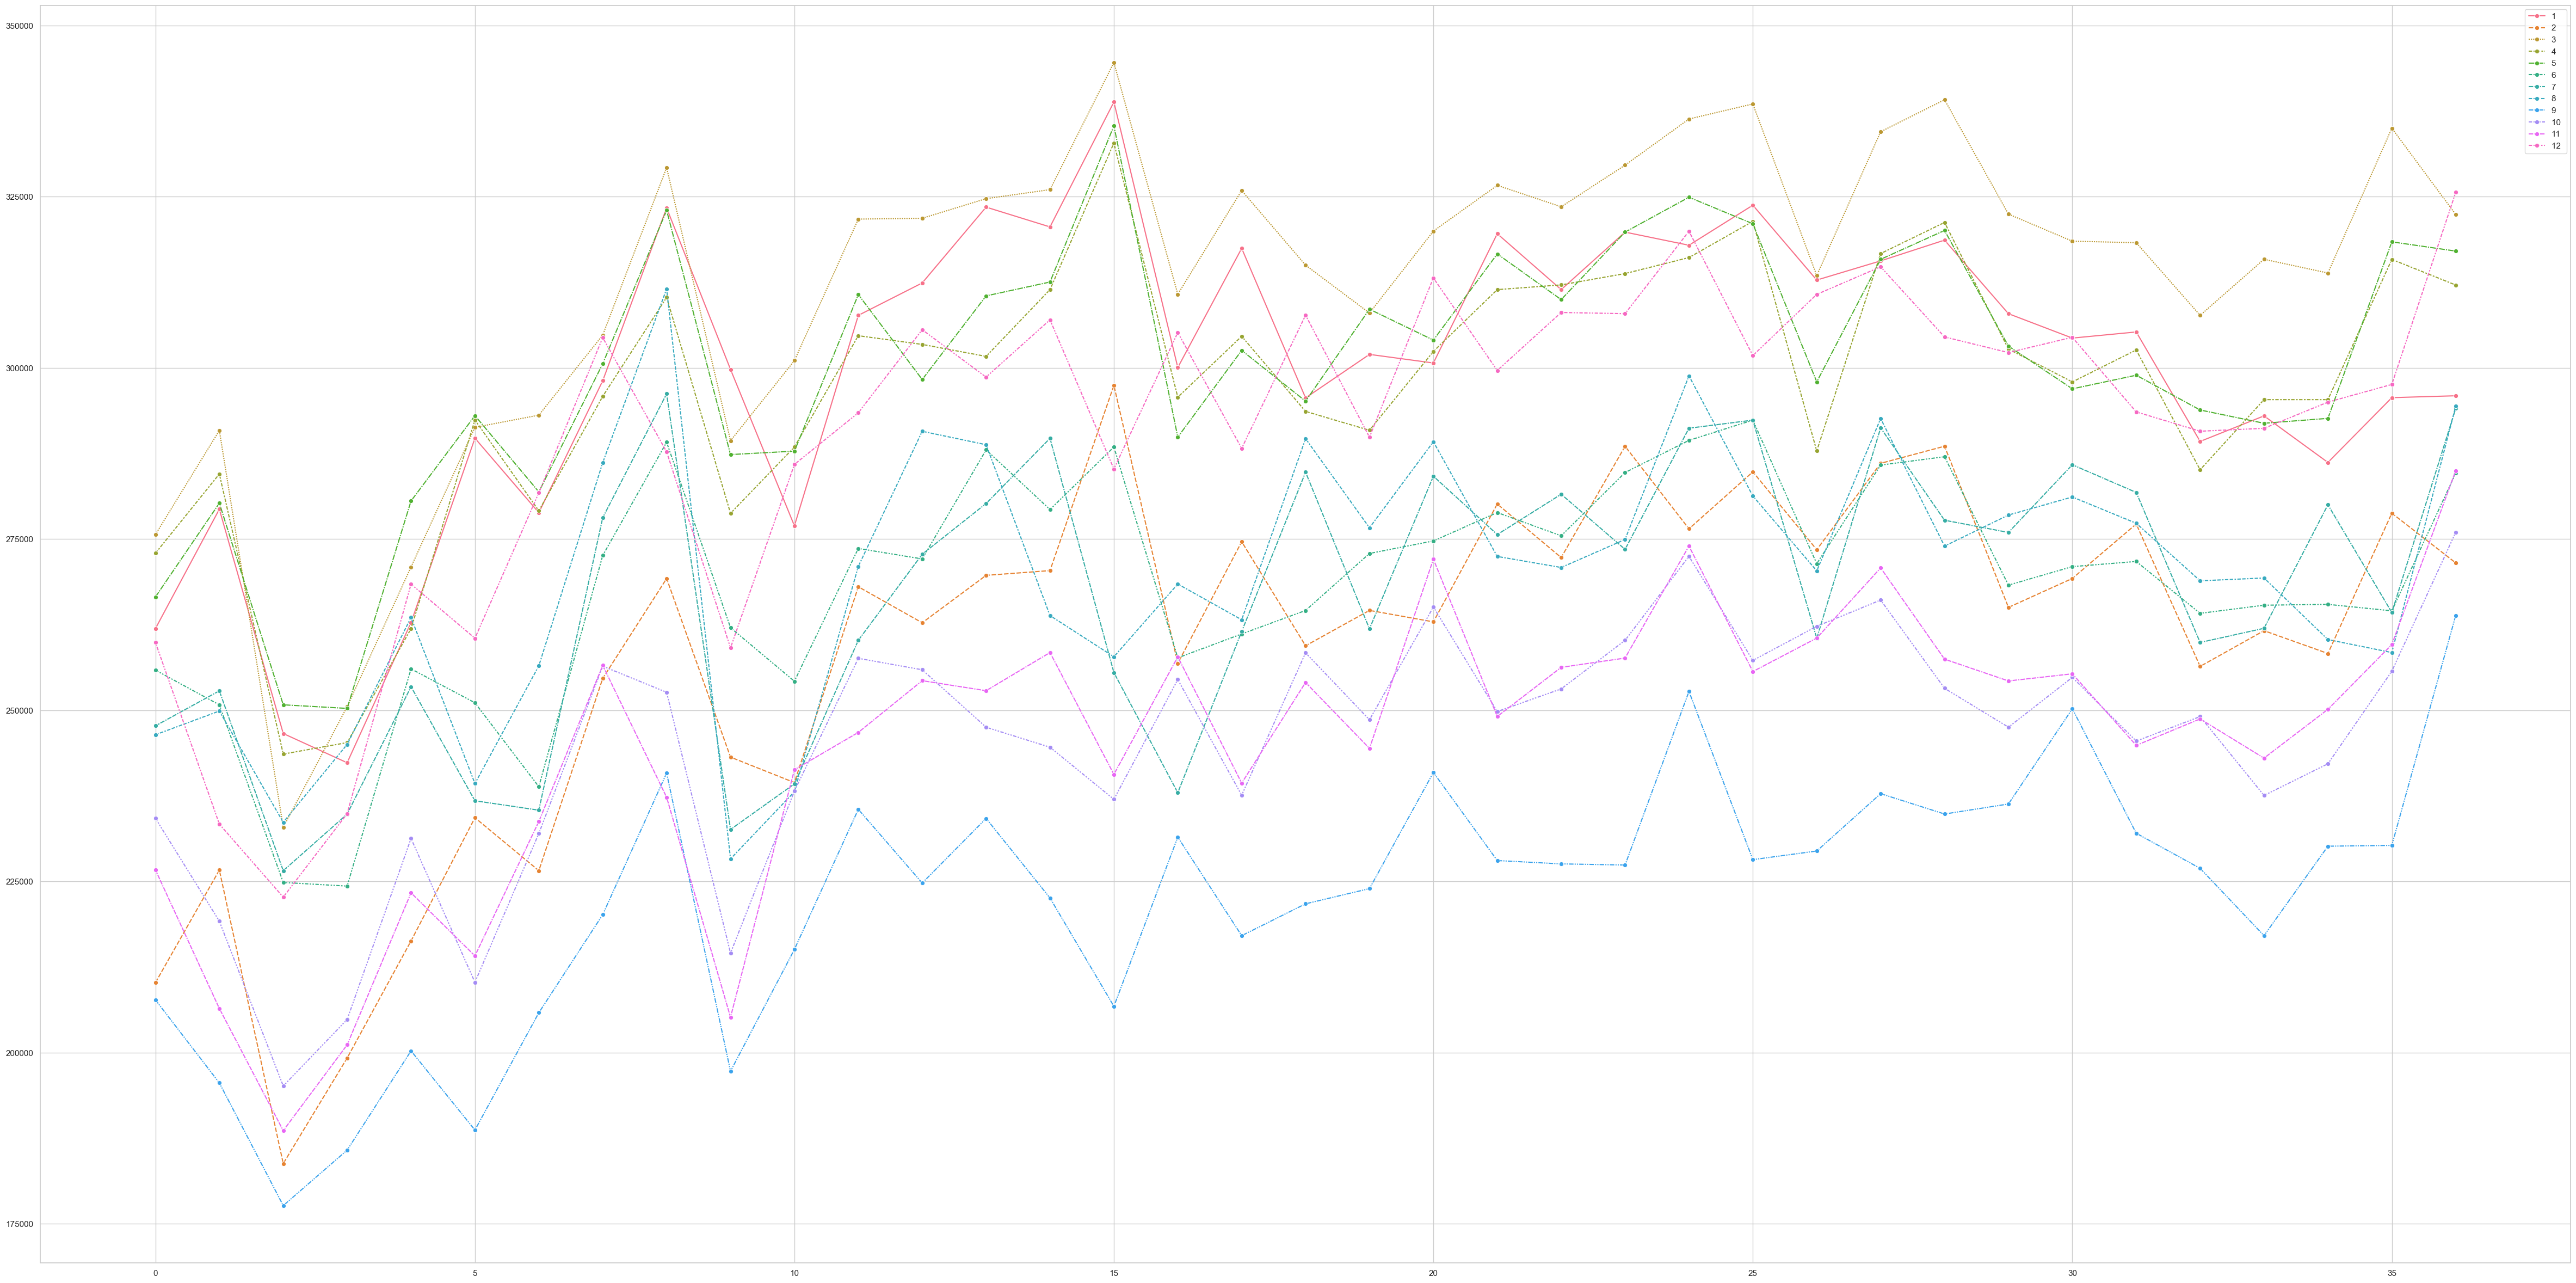

In [8]:
fig = plt.figure(figsize=(20, 4))
sns.set_theme(style="whitegrid")
sns.lineplot(data=processing_volume, x='year', y='total', marker='o')

fig = plt.figure(figsize=(60, 30))
sns.set_theme(style="whitegrid")
sns.lineplot(data=processing_volume.drop(['total'], axis=1), marker='o')

Overall, the trends of monthly volume over years are not so different from the total volume. Most months have clear drop in 1987 and rise in 1992-1993. In other years, different months fluctuate differently, but there are still some months fluctuate like the total volume. Furthermore, all the months have the trend of increasing over years, like the total volumn. 

Text(0.5, 0, 'Months')

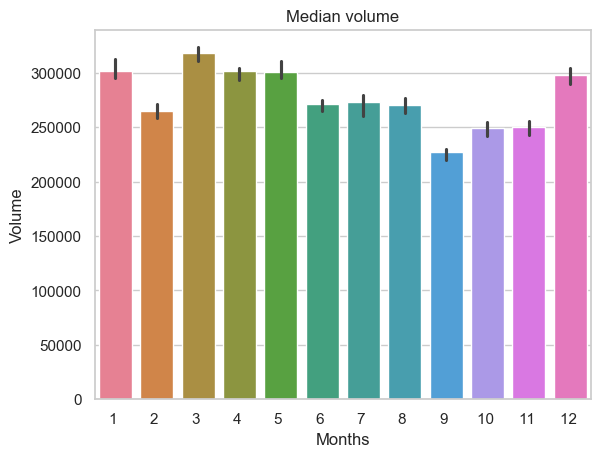

In [9]:
sns.barplot(processing_volume.iloc[:, 2:], estimator="median")
plt.title('Median volume')
plt.ylabel('Volume')
plt.xlabel('Months')

As mentioned above, volume drop significantly in February and September. The volume in September is even the lowest.

# Time series analysis

I analysis the dataset as time series and build a time-series model to see whether I can predict the processing volume.

### Convert to time-series format

In [10]:
year_date = []
amount = []

for i in range(processing_volume.shape[0]):
    year = "{}".format(1985+i)
    for j in range(processing_volume.shape[1]):
        if j > 1:
            month = j - 1
            month = "{:02d}".format(month)
            if month in ["01","03","05","07","08","10","12"]:
                date = "31"
            elif month == "02":
                date = "28"
            else:
                date = "30"

            temp = "{}-{}-{}".format(year, month, date)
            year_date.append(temp)
            amount.append(processing_volume.iloc[i,j])
            #print("{}-{}-{}".format(year, month, date))
amount = np.array(amount) 
time_series_data=pd.DataFrame(data={'Year_Month': year_date, 'Amount': amount})
time_series_data['Year_Month'] = pd.to_datetime(time_series_data['Year_Month'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
time_series_data

Year_Month    Amount
0    1985-01-31  261937.0
1    1985-02-28  210236.0
2    1985-03-31  275668.0
3    1985-04-30  272943.0
4    1985-05-31  266557.0
..          ...       ...
439  2021-08-31  294395.0
440  2021-09-30  263848.0
441  2021-10-31  275994.0
442  2021-11-30  284999.0
443  2021-12-31  325639.0

[444 rows x 2 columns]

Text(0.5, 0, 'Time')

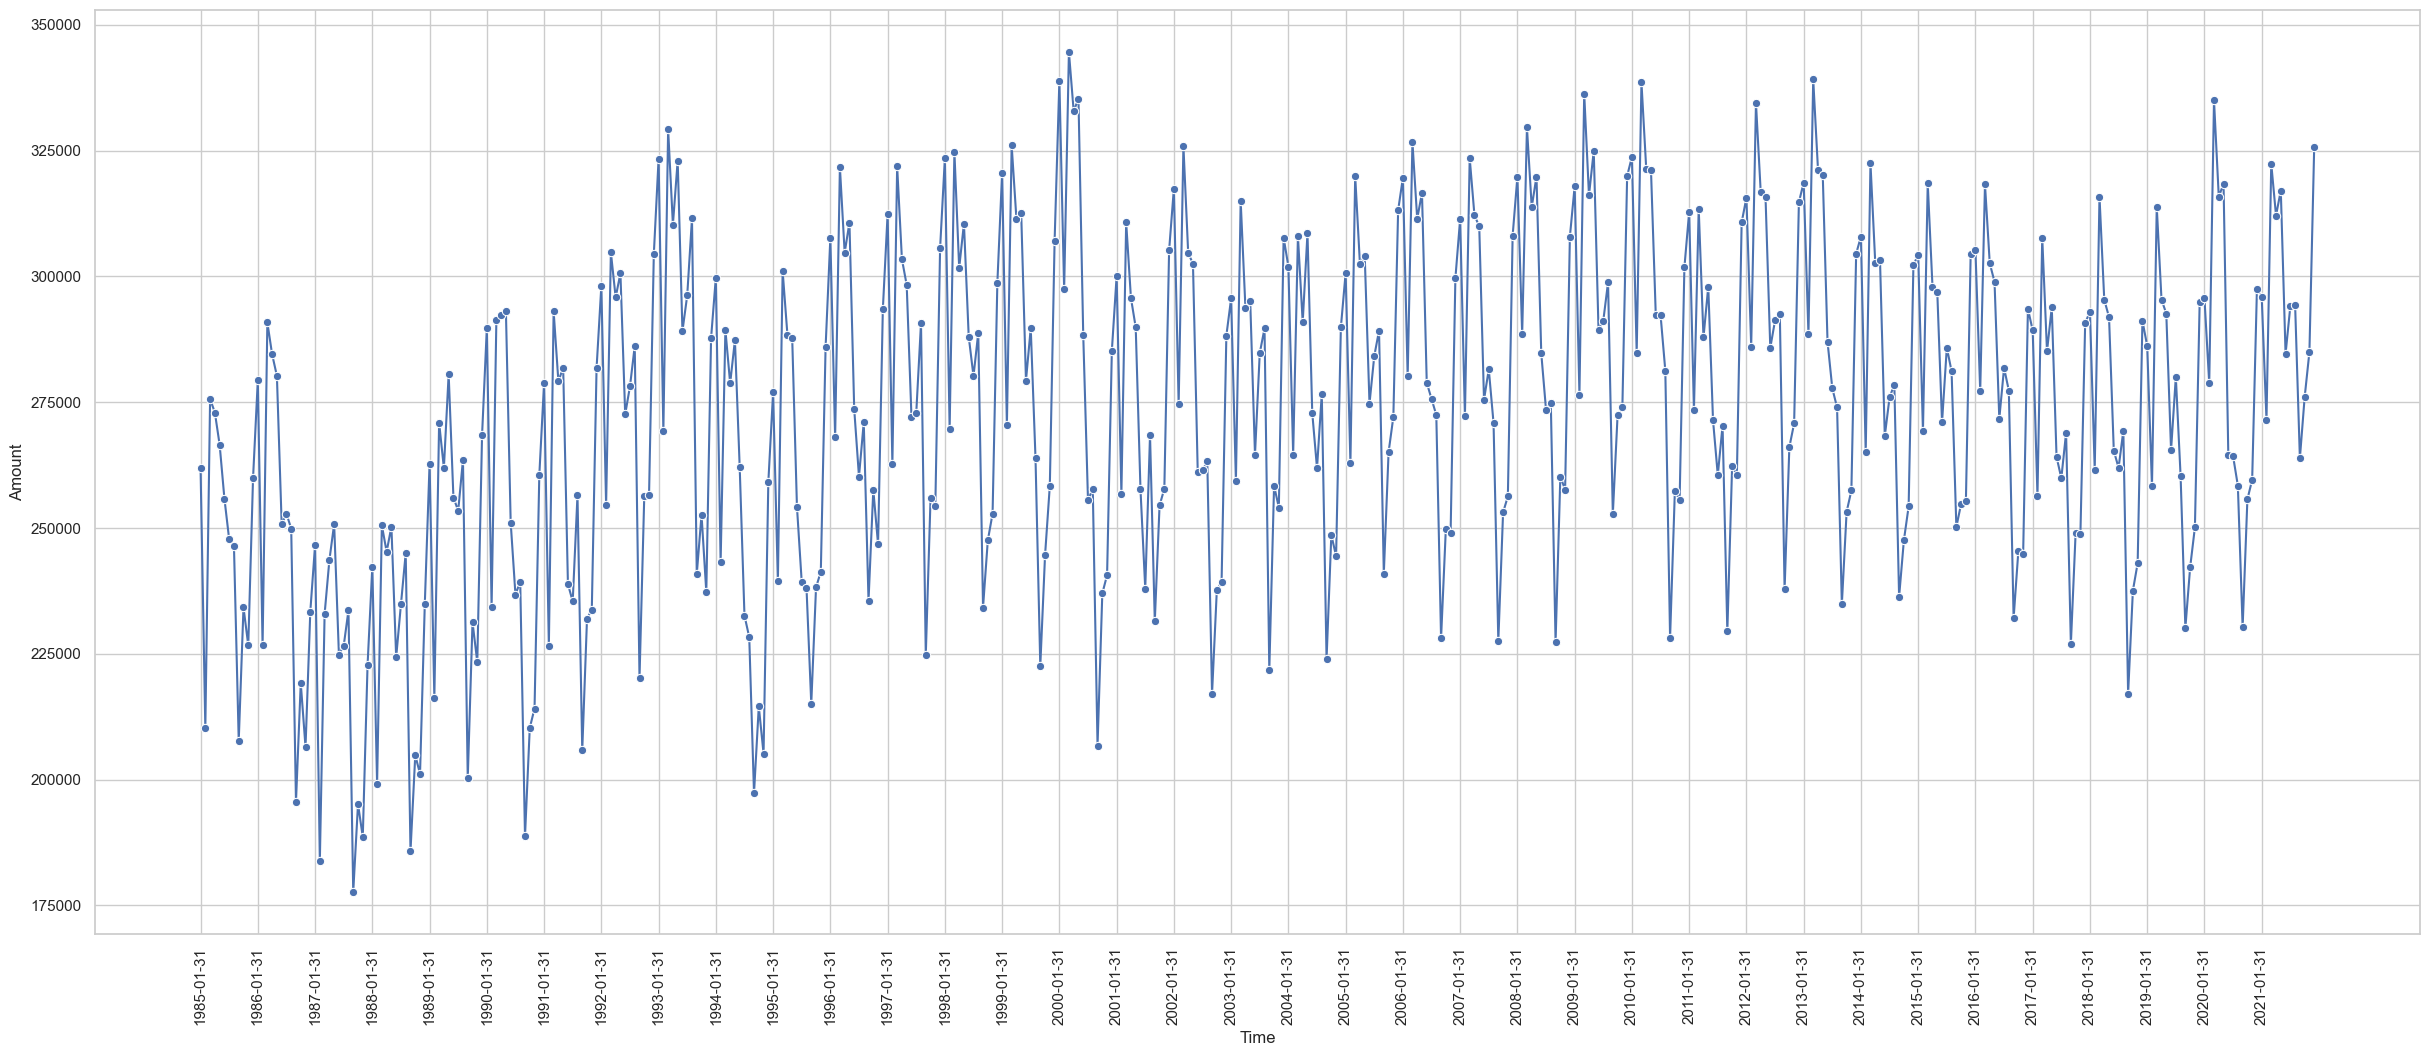

In [11]:
ticks = np.arange(0, 444, 12)

plt.figure(figsize=(30, 12))
sns.lineplot(data=time_series_data, x='Year_Month', y='Amount', marker='o')
plt.xticks(ticks=ticks, rotation='vertical')
plt.xlabel('Time')

This plot shows both the `trend` of volume increasing over years and the `seasonality` of each year. `Trend` and `seasonality` are two features that we need to decompose with extra carefulness when analysing time series.

### Visualize trend, seasonality, and differentiation

Here, we decompose time series into `trend` and `seasonality`, and visulize them. Removing `trend` and `seasonality` is important for further time series analysis, and ***differentiation*** is a common technique to remove `trend` and `seasonality`.

In [12]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL

In [13]:
def GetSTR(data_frame, feature='Amount'):
    stl = STL(data_frame.loc[:, feature].values, period=12)
    seasonal_res = stl.fit()
    
    data_frame['trend'] = seasonal_res.trend
    data_frame['seasonal'] = seasonal_res.seasonal
    data_frame['residual'] = seasonal_res.resid

    ticks = np.arange(0, 444, 12)

    plt.figure(figsize=(60, 45))
    plt.subplot(411)
    sns.lineplot(data=data_frame, x='Year_Month', y=feature, marker='o', label='Original Time Series')
    plt.legend(loc='upper left', fontsize='40')
    plt.xticks(ticks=ticks, rotation='vertical')
    plt.xlabel('Time')
    
    plt.subplot(412)
    sns.lineplot(data=data_frame, x='Year_Month', y='trend', label='Trend')
    plt.legend(loc='upper left', fontsize='40')
    plt.xticks(ticks=ticks, rotation='vertical')
    plt.xlabel('Time')
    
    plt.subplot(413)
    sns.lineplot(data=data_frame, x='Year_Month', y='seasonal', label='Seasonal')
    plt.legend(loc='upper left', fontsize='40')
    plt.xticks(ticks=ticks, rotation='vertical')
    plt.xlabel('Time')
    
    plt.subplot(414)
    sns.lineplot(data=data_frame, x='Year_Month', y='residual', label='Residual')
    plt.legend(loc='upper left', fontsize='40')
    plt.xticks(ticks=ticks, rotation='vertical')
    plt.xlabel('Time')
    
    plt.tight_layout()
    plt.show()

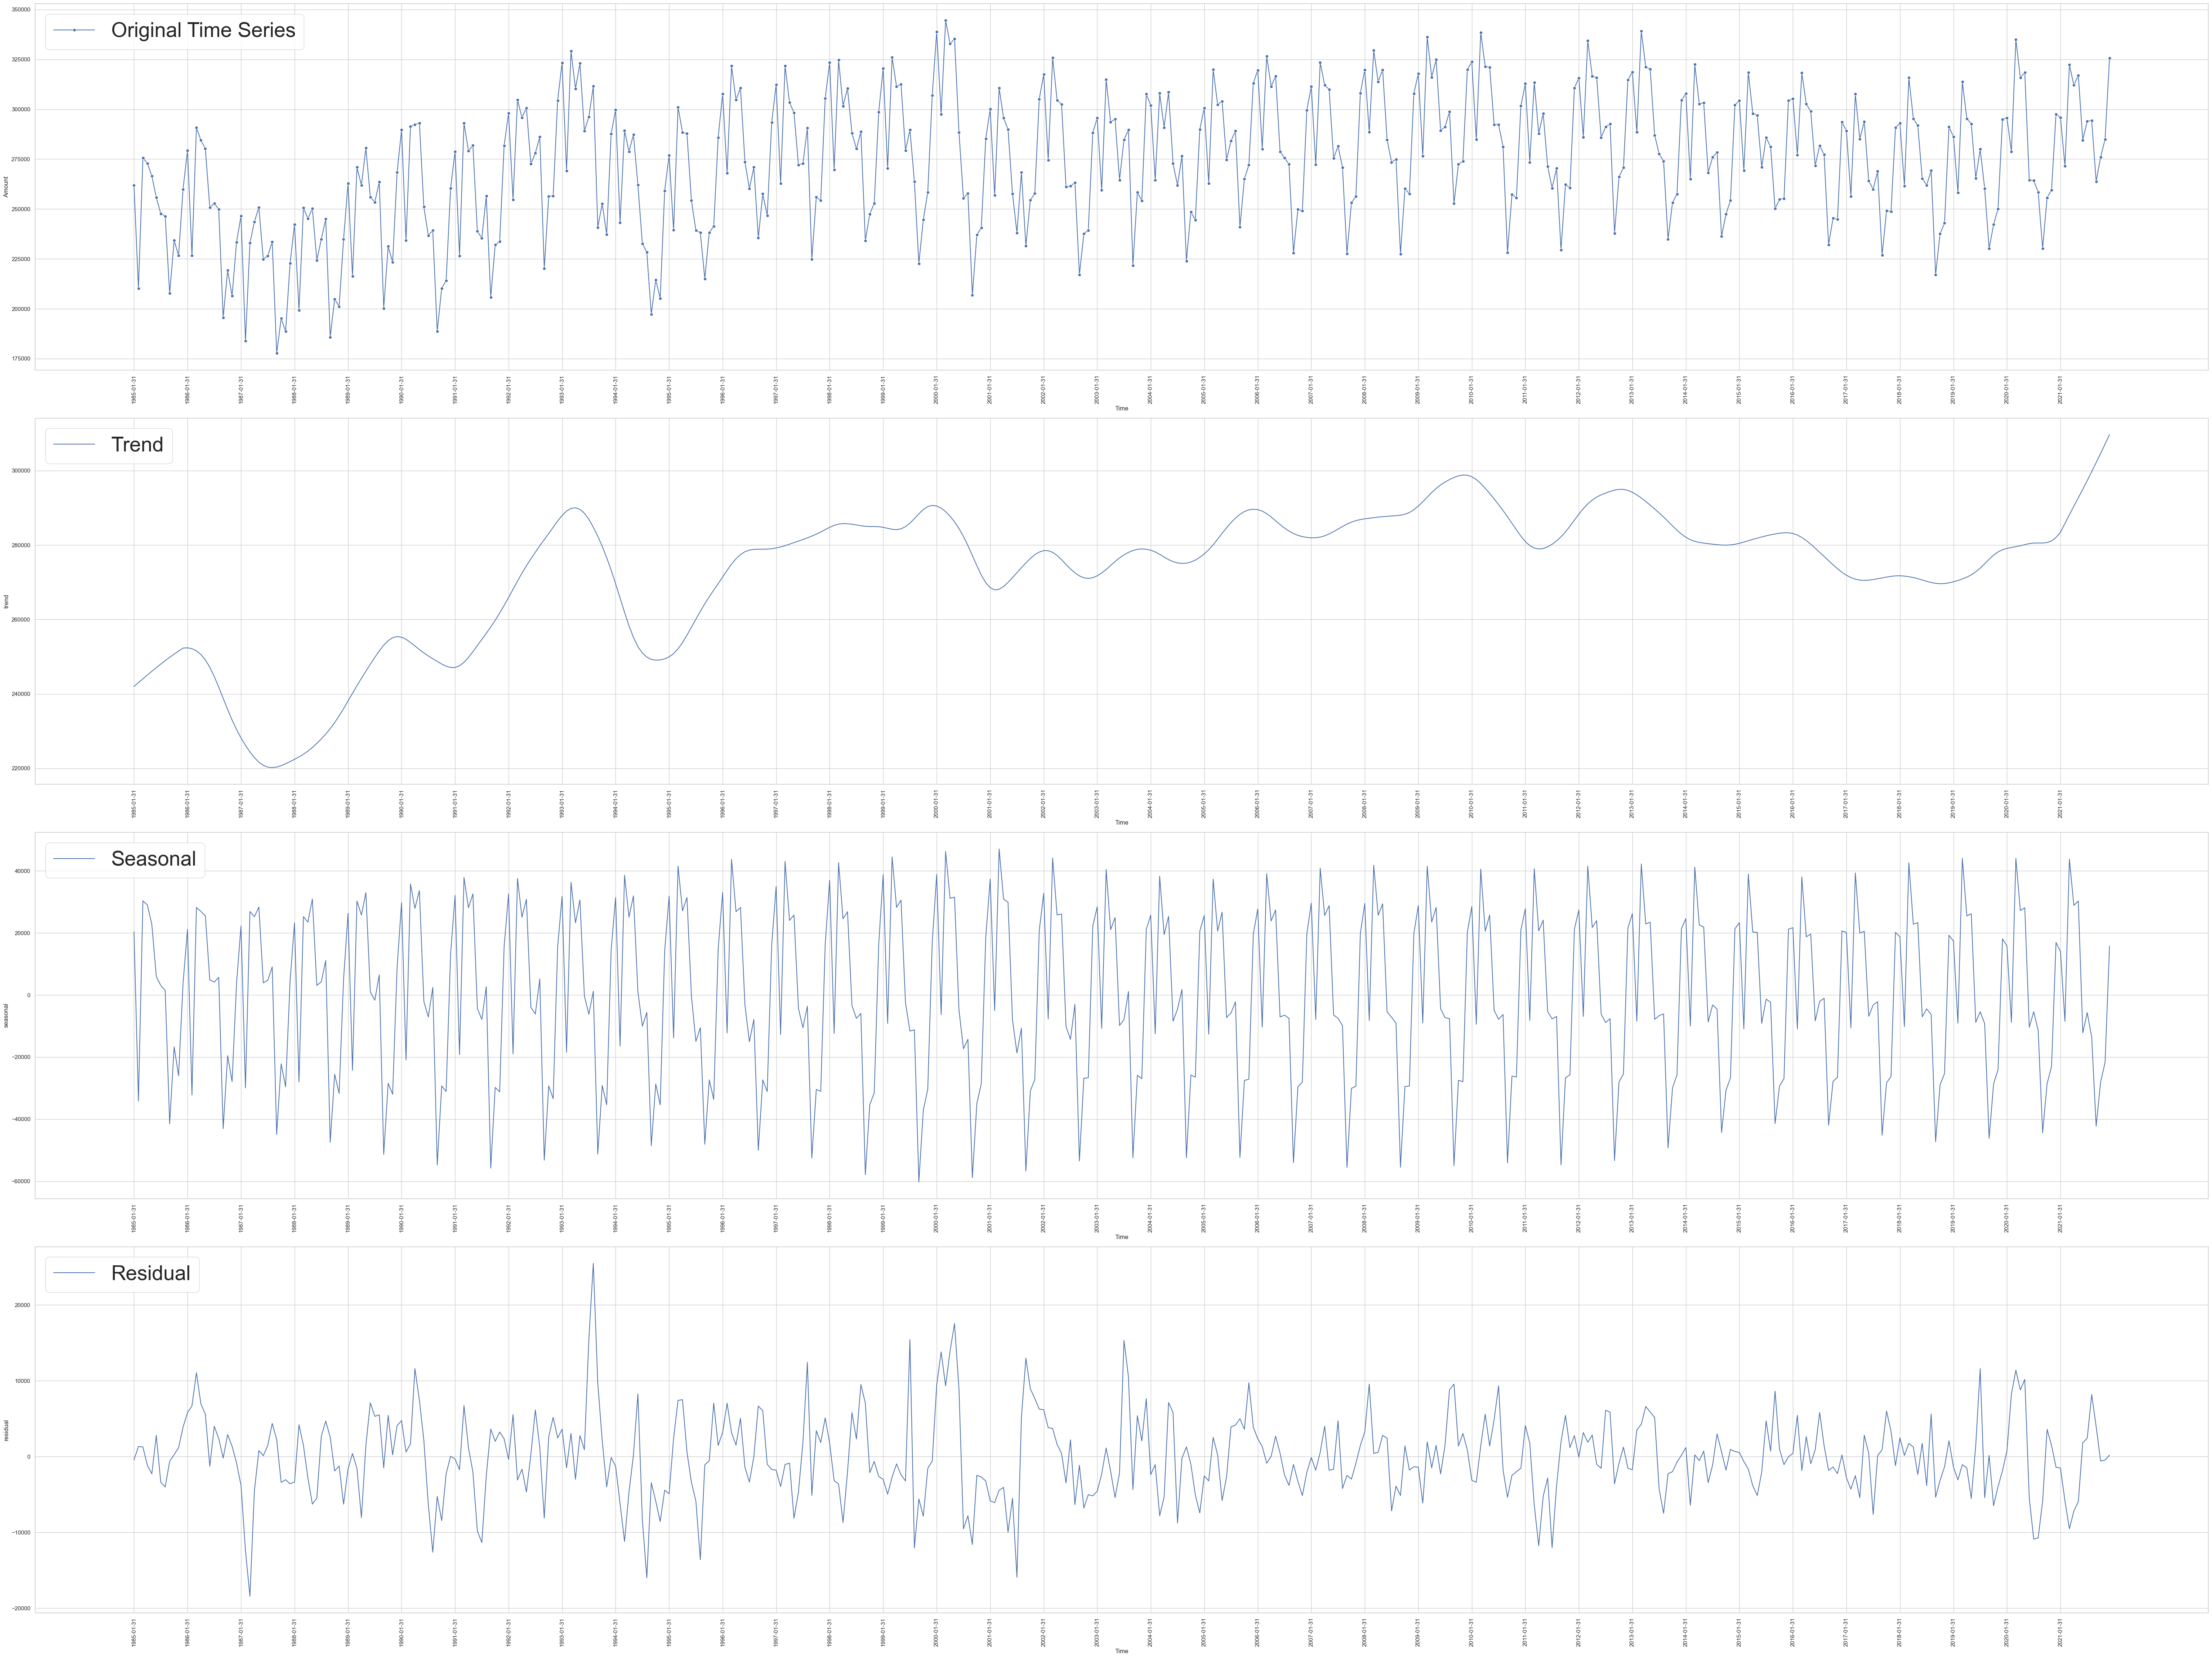

In [14]:
GetSTR(time_series_data)

Now we clearly see the trend of increasing and a seasonality as a year.

In [15]:
# Get differentiation and plot
def GetDiff(data_frame, period, feature='Amount'):
    temp_frame = data_frame.copy()
    if period != 1:
        temp_frame['diff_{}'.format(period)] = temp_frame[feature].diff(periods=period)
    else:
        temp_frame['diff_{}'.format(period)] = temp_frame[feature].diff()

    ticks = np.arange(0, 444, 12)
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=data_frame, x='Year_Month', y=feature, marker='o', label='{}-diff'.format(period))
    plt.xticks(ticks=ticks, rotation='vertical')
    plt.xlabel('Time')

    return temp_frame

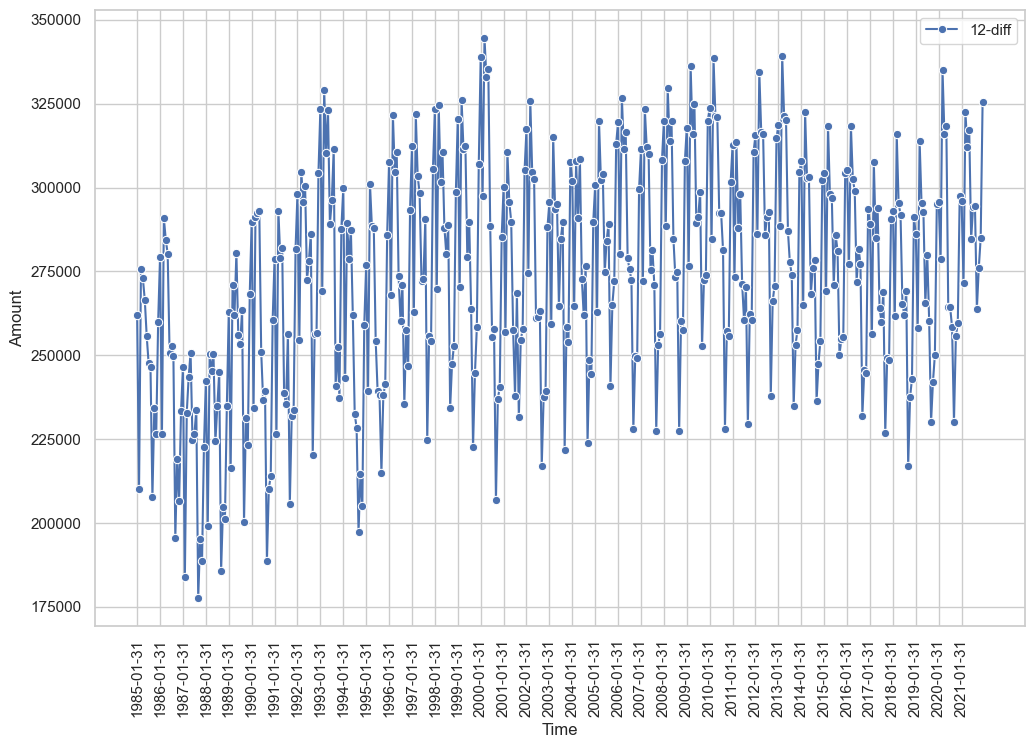

In [16]:
diff_12_frame = GetDiff(time_series_data, 12)

We first do a seasonal difference (subtraction the same month one year ago). As the plot shows, although the trend and seasonality become weaker after the seasonal difference, we can still see the trend a weak seasonality. Therefore, I do a further first difference (subtration by previous month).

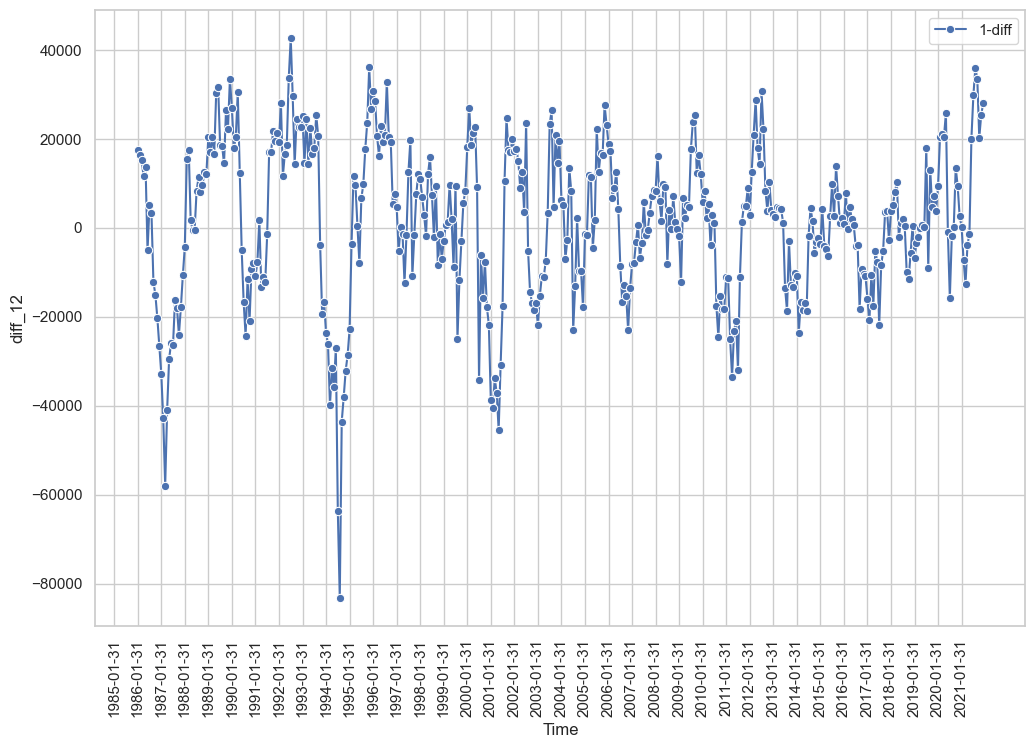

In [17]:
diff_further_frame = GetDiff(diff_12_frame, period=1, feature='diff_12')

After a further first difference, the trend disappears. It is also hard to tell the seasonality. The two-time differentiated time series here looks random, and this kind of time series are defined as ***stationary***. Therefore, I will use this stationary time series to pick model parameters for `seasonal ARIMA model`, which I will use for fitting the time series data of monthly processing volumes. 

### Plot auto-correlation function and find seasonal ARIMA model parameters

In [18]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [19]:
diff_12_frame = diff_12_frame.dropna()
diff_further_frame = diff_further_frame.dropna()

In [20]:
# Augmented Dickey-Fuller test
print(adfuller(time_series_data['Amount'].values)[1])
print(adfuller(diff_12_frame['diff_12'].values)[1])
print(adfuller(diff_further_frame['diff_1'].values)[1])

0.09595786777657184
1.614302774811409e-06
4.345891338776657e-14


The augmented Dickey-Fuller test is a hypothesis test against the null hypothesis that the time series is non-stationary. As the results show, the p-value for the original time seris is 0.09, larger than 0.05, which indicates we can not reject the hypothesis that the original time series is non-stationary; the p-values for both differenced time series are smaller than 0.05, which reject the hypothesis that the differenced time series is non-stationary. However, we will see that the two-time differentiated time series is more suitable for picking seasonal ARIMA model parameters when plotting the auto-correlation functions. 

Text(0.5, 1.0, 'Autocorrelation of seasonal differenced time series')

<Figure size 1200x800 with 0 Axes>

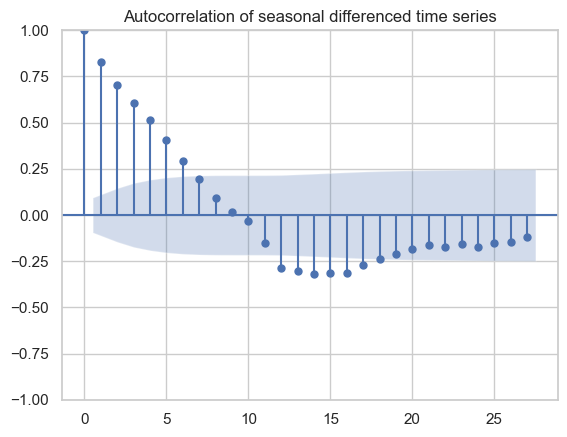

In [21]:
plt.figure(figsize=(12, 8))
plot_acf(diff_12_frame['diff_12'])
plt.title('Autocorrelation of seasonal differenced time series')

The consecutive significant spikes in the autocorrelation are not indicative of any simple model. Implementing high-order autoregressive models is not efficient and might make the time series model unstable.

Text(0.5, 1.0, 'Autocorrelation of two-time differenced time series')

<Figure size 1200x800 with 0 Axes>

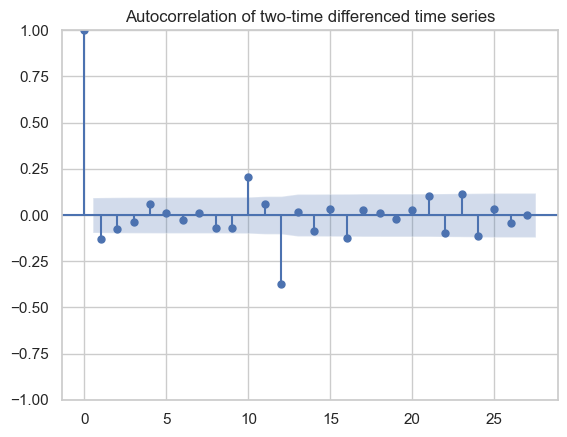

In [22]:
plt.figure(figsize=(12, 8))
plot_acf(diff_further_frame['diff_1'])
plt.title('Autocorrelation of two-time differenced time series')

In the autocorrelation of two-time differenced time series, we can only see two significant spikes at lag-1 and lag-10 before the seasonality at lag-12, indicating a simple model for the seasonal part in the time series model (seasonal ARIMA).

Text(0.5, 1.0, 'Partial-autocorrelation of two-time differenced time series')

<Figure size 1200x800 with 0 Axes>

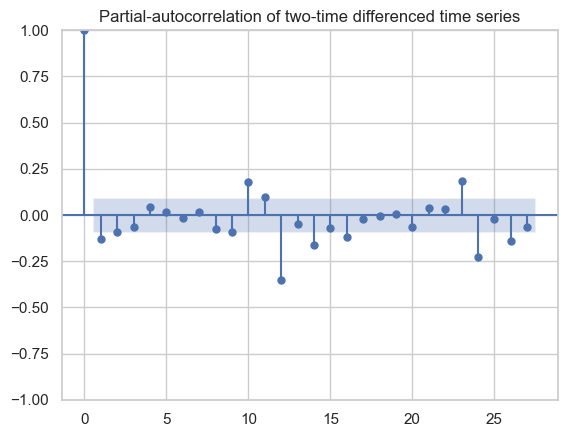

In [23]:
plt.figure(figsize=(12, 8))
plot_pacf(diff_further_frame['diff_1'])
plt.title('Partial-autocorrelation of two-time differenced time series')

We now try to "make a good guess" for the seasonal ARIMA model parameters, ARIMA(p, d, q)(P, D, Q, s). The former set of lower case of p, d, and q is for the non-seasonal part in the time series, and the latter set of upper case of P, D, Q is for the seasonal part in the time series.

- `s`: we do not have to guess for `s`. `s` is the periodity. Since the data is monthly and we see in `visualize` that every year have the same trend, we can conclude that every ***12*** data points form a period. Therefore, we set `s = 12`.

- `d` and `D`: we also do not have to guess for `d` and `D`. To get this stationary two-time differenced time series, we do `one` first differencing (non-seasonal, `d=1`), and `one` seasonal differencing (`D=1`).

- Assumption: for (p, q), we assume either (p, 0) or (0, q). Same for (P, Q), either (P, 0) or (0, Q).

- We use partial auto-correlation to decide p (and set `q = 0`). Except lag-10 and lag-11, which are close to period (lag-12), there is no significant spikes after lag-2. Therefore, we set `p = 2`.

- We use auto-correlation to decide Q (and set `P=0`). To decide the value of Q, we examine the spike at lag-12, lag-24, lag-36, and etc.. While the spike at lag-12 is very significant, the spike at lag-24 is nearly not significant. The spike at every periods after lag-24 would just decay. Therefore, we set `Q=1`.

### Dataset splitting and time series fitting

In [24]:
# Take the last 12-month data as test set
time_series_past, time_series_test = time_series_data[time_series_data['Year_Month'] < '2021'], time_series_data[time_series_data['Year_Month'] > '2021']

In [25]:
endog = time_series_past.loc[:, 'Amount'].values

In [26]:
model = sm.tsa.arima.ARIMA(endog, order=(2, 1, 0), seasonal_order=(0, 1, 1, 12))

In [27]:
res = model.fit()
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  432
Model:             ARIMA(2, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -4440.597
Date:                            Mon, 14 Oct 2024   AIC                           8889.194
Time:                                    04:52:16   BIC                           8905.346
Sample:                                         0   HQIC                          8895.579
                                            - 432                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0453      0.024     -1.914      0.056      -0.092       0.001
ar.L2         -0.0743      0.041   

### Results

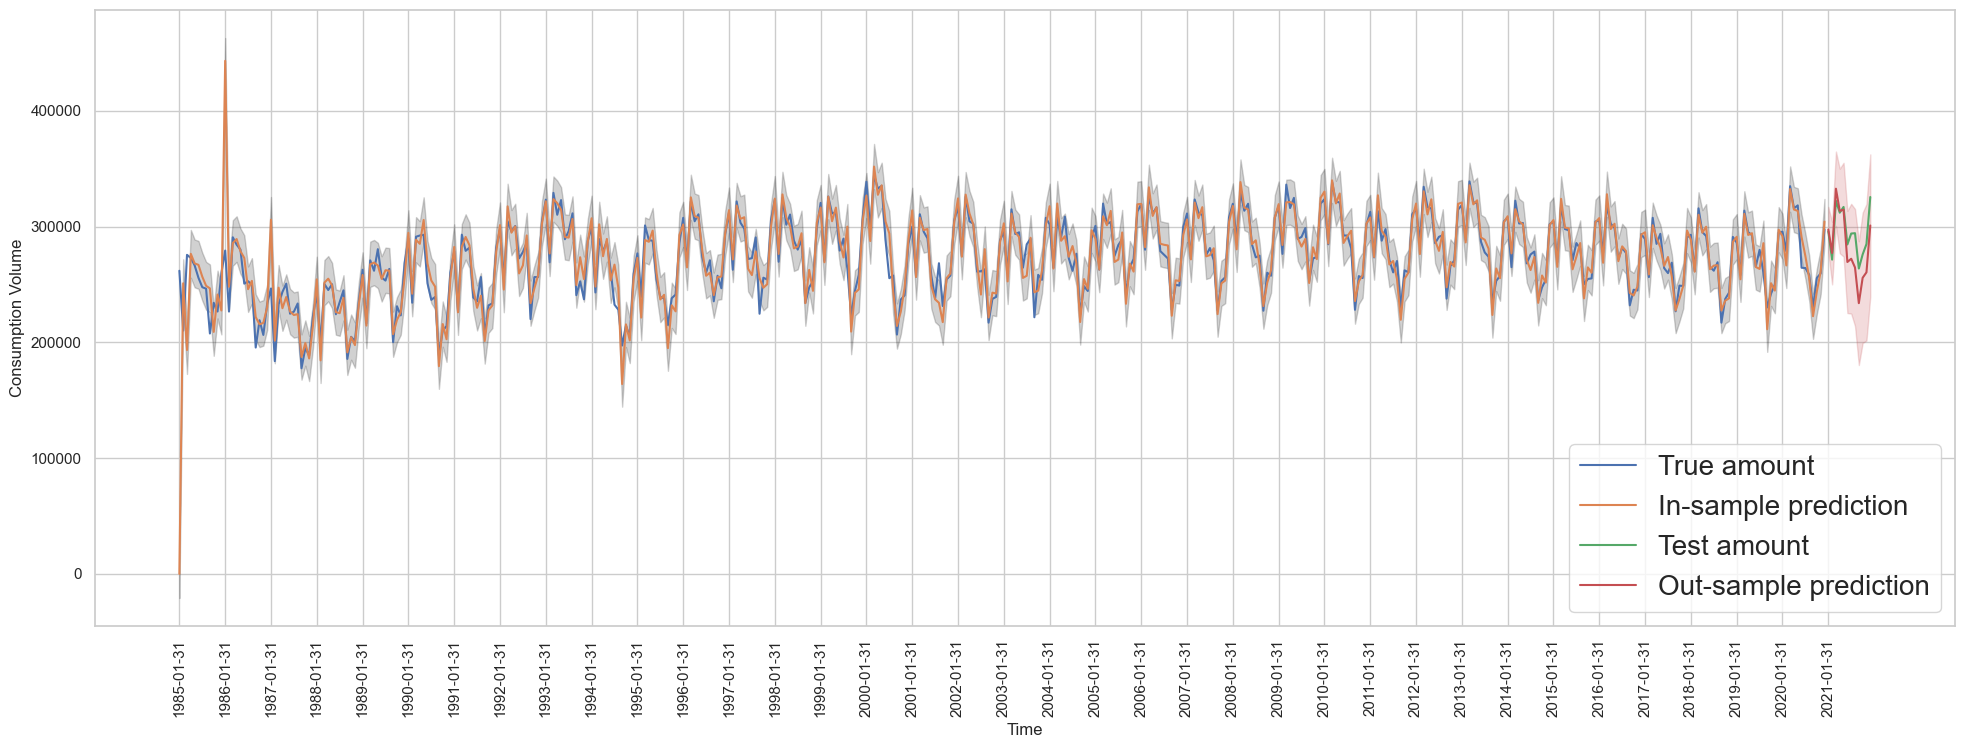

In [28]:
in_pred=res.get_prediction(start = 0, dynamic=False)
time_series_past['predicted'] = in_pred.predicted_mean
in_pred_ci = in_pred.conf_int()

out_pred = res.get_forecast(steps=12)
time_series_test['predicted'] = out_pred.predicted_mean
out_pred_ci = out_pred.conf_int()

ticks = np.arange(0, 444, 12)

plt.figure(figsize=(24, 8))
sns.set_theme(style="whitegrid")
sns.lineplot(data=time_series_past, x='Year_Month', y='Amount', label='True amount')
sns.lineplot(data=time_series_past, x='Year_Month', y='predicted', label='In-sample prediction')
plt.fill_between(time_series_past['Year_Month'],
                in_pred_ci[:, 0],
                in_pred_ci[:, 1], color='k', alpha=.2)

sns.lineplot(data=time_series_test, x='Year_Month', y='Amount', label='Test amount')
sns.lineplot(data=time_series_test, x='Year_Month', y='predicted', label='Out-sample prediction')
plt.fill_between(time_series_test['Year_Month'],
                out_pred_ci[:, 0],
                out_pred_ci[:, 1], color='r', alpha=.2)

plt.xticks(ticks=ticks, rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Consumption Volume')
plt.legend(fontsize=20)
plt.show()

Except at the beginning of the time series, where the fitting is not yet converged, the discrepancy between the true volume and predicted volume is small and within 95% confidence interval. Furthermore, the true volume in the last 12 months is also in the 95% confidence interval of our out-sample prediction, which means that our time-series model is robust and can be use to predict the processing volume of dairy products to more present time.

# A more rigorous search for seasonal ARIMA model parameters

In [29]:
import itertools
d = seasonal_d =1
p = q = range(0, 3)
pq = list(itertools.product(p, q))
seasonal_pq = [(x[0], seasonal_d, x[1], 12) for x in pq]


In [30]:
aic_min = float("inf")

for x1 in pq:
    for x2 in seasonal_pq:
        try:
            model = sm.tsa.arima.ARIMA(endog, order = (x1[0], d, x1[1]), seasonal_order = x2)
            results = model.fit()
            if results.aic < aic_min:
                aic_min = results.aic
                print('Optimized model parameters:')
                print('(p, d, q, P, D, Q)=({}, {}, {}, {}, {}, {})'.format(x1[0], d, x1[1], x2[0], seasonal_d, x2[2]))
                best_model = model
        except:
            continue


Optimized model parameters:
(p, d, q, P, D, Q)=(0, 1, 0, 0, 1, 0)
Optimized model parameters:
(p, d, q, P, D, Q)=(0, 1, 0, 0, 1, 1)
Optimized model parameters:
(p, d, q, P, D, Q)=(0, 1, 0, 0, 1, 2)
Optimized model parameters:
(p, d, q, P, D, Q)=(0, 1, 0, 1, 1, 2)
Optimized model parameters:
(p, d, q, P, D, Q)=(0, 1, 0, 2, 1, 1)


/Users/danichao/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


By grid search, we get an optimized time series model with non-seasonal parameters (p, d, q) = (0, 1, 0), and seasonal parameters (P, D, Q, s) = (2, 1, 1, 12). This is different from our "guess model", but they are probably not too much different. We note that, ***although grid search is a more rigorus method to decide time series parameters, auto-correlation and partial auto-correlation are also helpful to decide to range of the search grid.***

In [31]:
optimized_model = sm.tsa.arima.ARIMA(endog, order=(0, 1, 0), seasonal_order=(2, 1, 1, 12))
optimized_res = optimized_model.fit()
print(optimized_res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  432
Model:             ARIMA(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood               -4414.427
Date:                            Mon, 14 Oct 2024   AIC                           8836.854
Time:                                    04:55:34   BIC                           8853.006
Sample:                                         0   HQIC                          8843.239
                                            - 432                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3546      0.036      9.749      0.000       0.283       0.426
ar.S.L24      -0.1055      0.022   

### Check the results of optimized model

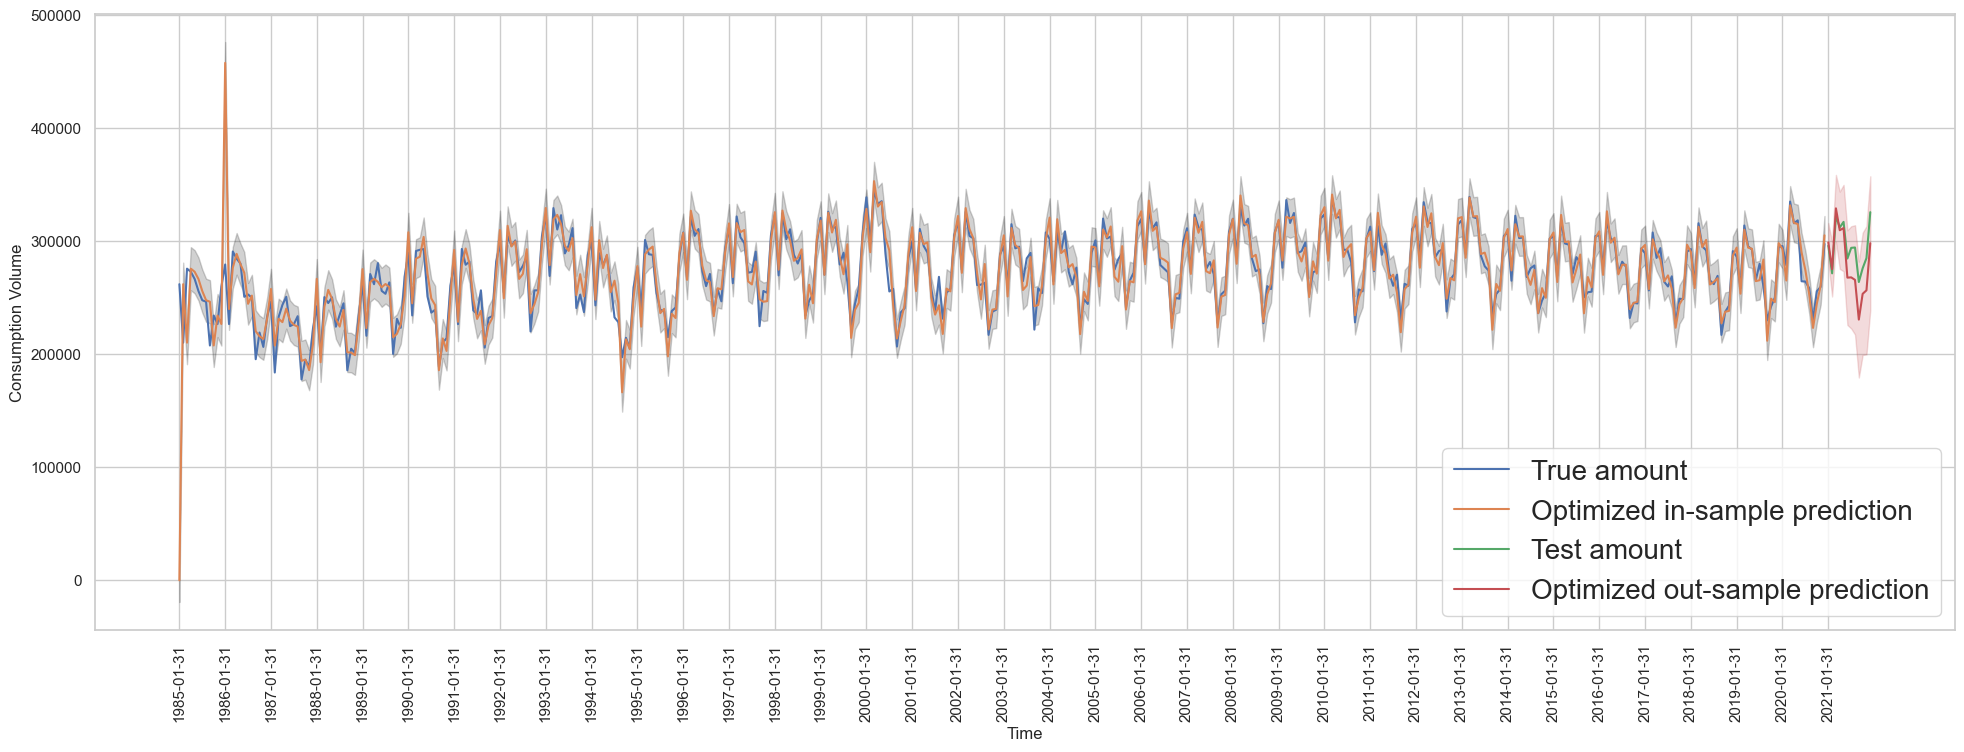

In [32]:
in_pred=optimized_res.get_prediction(start = 0, dynamic=False)
time_series_past['predicted'] = in_pred.predicted_mean
in_pred_ci = in_pred.conf_int()

out_pred = optimized_res.get_forecast(steps=12)
time_series_test['predicted'] = out_pred.predicted_mean
out_pred_ci = out_pred.conf_int()

ticks = np.arange(0, 444, 12)

plt.figure(figsize=(24, 8))
sns.set_theme(style="whitegrid")
sns.lineplot(data=time_series_past, x='Year_Month', y='Amount', label='True amount')
sns.lineplot(data=time_series_past, x='Year_Month', y='predicted', label='Optimized in-sample prediction')
plt.fill_between(time_series_past['Year_Month'],
                in_pred_ci[:, 0],
                in_pred_ci[:, 1], color='k', alpha=.2)

sns.lineplot(data=time_series_test, x='Year_Month', y='Amount', label='Test amount')
sns.lineplot(data=time_series_test, x='Year_Month', y='predicted', label='Optimized out-sample prediction')
plt.fill_between(time_series_test['Year_Month'],
                out_pred_ci[:, 0],
                out_pred_ci[:, 1], color='r', alpha=.2)

plt.xticks(ticks=ticks, rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Consumption Volume')
plt.legend(fontsize=20)
plt.show()

The improvement of the optimized model from the "guess model" is not huge, but it is also not marginal. Our eyes can actually tell that the prediction by optimized model is more consistent with true volume in small local spikes.